In [2]:
import joblib
import numpy as np
import pandas as pd
import sklearn
import imblearn
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
#from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler

C:\Users\Caroline\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [3]:
warnings.filterwarnings('ignore')

In [4]:
df_diabetes = pd.read_csv('df_diabetes.csv', low_memory=False)

In [5]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 60.1 KB


In [7]:
df_diabetes.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [6]:
df_diabetes.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
df_diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
X=df_diabetes.drop(columns= ['Outcome', 'Insulin'],axis=1)
y=df_diabetes['Outcome']

<Axes: ylabel='Outcome'>

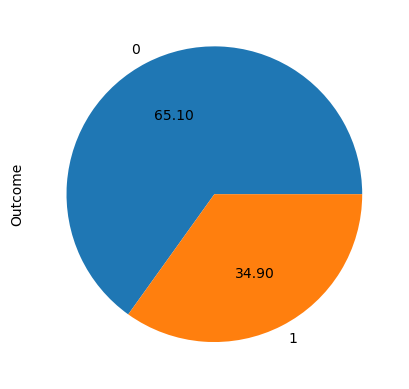

In [9]:
# Affichage actuel des classes (malades / sains)
y.value_counts().plot.pie(autopct='%.2f')

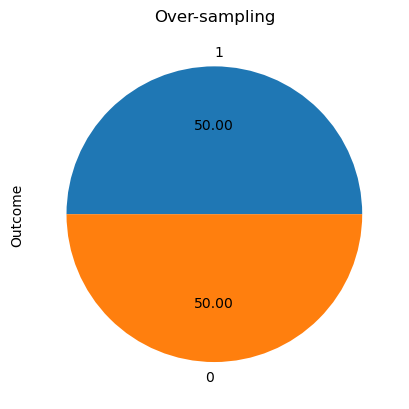

In [10]:
# Rééquilibrage et visualisation des classes après application du over-sampler
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [19]:
# Liste des scalers et classifiers
scaler_list1= [Normalizer(), StandardScaler(), MinMaxScaler()]
scaler_list2= [ MaxAbsScaler(), RobustScaler(),PowerTransformer()]
classifier_list= [ RandomForestClassifier(), LogisticRegression(), SVC(),
                  MLPClassifier(), XGBClassifier(), LGBMClassifier(),
                  CatBoostClassifier(), GaussianNB() ]

In [20]:
#Création du pipeline
results1= []
for scaler in scaler_list1:
    for classifier in classifier_list:
        pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
        ])
        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')
        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)
        Accuracy= accuracy_score(y_res, y_pred),
        Precision= precision_score(y_res, y_pred),
        Recall= recall_score(y_res, y_pred),
        F1_Score= f1_score(y_res, y_pred),
        ROC_AUC= roc_auc_score(y_res, y_pred)
        results1.append((classifier.__class__.__name__, scaler.__class__.__name__, 
                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1488
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [21]:
# Création du Pipepline
results2= []
for scaler in scaler_list2:
    for classifier in classifier_list:
        pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
        ])
        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')
        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)
        Accuracy= accuracy_score(y_res, y_pred),
        Precision= precision_score(y_res, y_pred),
        Recall= recall_score(y_res, y_pred),
        F1_Score= f1_score(y_res, y_pred),
        ROC_AUC= roc_auc_score(y_res, y_pred)
        results2.append((classifier.__class__.__name__, scaler.__class__.__name__, 
                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [22]:
# Création des dataframes
results1 = pd.DataFrame(results1, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])
results2 = pd.DataFrame(results2, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])

In [23]:
#Choix du classifier et scaler classsé par Recall
total_result_undersampled= pd.concat([results1, results2], ignore_index = True)
total_result_undersampled.sort_values(by= ['Recall'], ascending= False)

,Classifier,Scaler,Accuracy,Recall,Precision,F1-Score,ROC_AUC
8,RandomForestClassifier,StandardScaler,"(0.806,)","(0.7703180212014135,)","(0.872,)","(0.8180112570356473,)",0.806
5,LGBMClassifier,Normalizer,"(0.79,)","(0.7665441176470589,)","(0.834,)","(0.7988505747126436,)",0.790
24,RandomForestClassifier,MaxAbsScaler,"(0.799,)","(0.7646017699115044,)","(0.864,)","(0.8112676056338028,)",0.799
16,RandomForestClassifier,MinMaxScaler,"(0.803,)","(0.7643979057591623,)","(0.876,)","(0.8164026095060578,)",0.803
32,RandomForestClassifier,RobustScaler,"(0.796,)","(0.7587412587412588,)","(0.868,)","(0.8097014925373135,)",0.796
40,RandomForestClassifier,PowerTransformer,"(0.796,)","(0.7534246575342466,)","(0.88,)","(0.8118081180811809,)",0.796
0,RandomForestClassifier,Normalizer,"(0.781,)","(0.7522441651705566,)","(0.838,)","(0.7928098391674551,)",0.781
4,XGBClassifier,Normalizer,"(0.777,)","(0.7477638640429338,)","(0.836,)","(0.7894239848914069,)",0.777
45,LGBMClassifier,PowerTransformer,"(0.785,)","(0.7427597955706985,)","(0.872,)","(0.8022079116835327,)",0.785
14,CatBoostClassifier,StandardScaler,"(0.779,)","(0.7426086956521739,)","(0.854,)","(0.7944186046511628,)",0.779


In [11]:
# Choix du scaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler_diabetes = StandardScaler()
X_scaled = scaler_diabetes.fit_transform(X_res)

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 150],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis pour être une feuille
    'max_features': ['auto', 'sqrt'],  # Nombre maximum de caractéristiques à considérer pour diviser un nœud
    'bootstrap': [True, False]  # Utiliser bootstrap échantillonnage lors de la construction des arbres
}


# Créer le modèle de Classifier
RandomForestDiabetes = RandomForestClassifier(random_state=42)

# Créer l'objet GridSearchCV avec validation croisée
grid_search = GridSearchCV(estimator=RandomForestDiabetes, param_grid=param_grid, cv=5, scoring='accuracy')

# Adapter GridSearchCV aux données
grid_search.fit(X_res, y_res)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)


Meilleurs paramètres: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Meilleur score: 0.866


In [12]:
# Normaliser les données
scaler_diabetes = StandardScaler()
X_scaled = scaler_diabetes.fit_transform(X_res)


# spliter X pour train test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=2)


# Entrainer le modèle XGBClassifier
RandomForestDiabetes = RandomForestClassifier(bootstrap= False, max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50)



RandomForestDiabetes.fit(X_train, y_train)

# Compare test and train score (accuracy score)
print("\nScore for the Train dataset :", RandomForestDiabetes.score(X_train, y_train))
print("Score for the Test dataset :", RandomForestDiabetes.score(X_test, y_test))




Score for the Train dataset : 1.0
Score for the Test dataset : 0.852


In [14]:
# matrice de confusion

from sklearn.metrics import confusion_matrix

# Convertir les classes en chaînes de caractères
classes_str = [str(c) for c in RandomForestDiabetes.classes_]

# Créer la matrice de confusion avec des noms de classes
confusion_df = pd.DataFrame(data=confusion_matrix(y_true=y_test, y_pred=RandomForestDiabetes.predict(X_test)),
                             index=[f"{c} ACTUAL" for c in classes_str],
                             columns=[f"{c} PREDICTED" for c in classes_str])

print(confusion_df)


          0 PREDICTED  1 PREDICTED
0 ACTUAL           93           21
1 ACTUAL           16          120


In [15]:
# sauvegarde du modèle
joblib.dump(RandomForestDiabetes, 'RandomForest_Diabetes.joblib')

['RandomForest_Diabetes.joblib']

In [25]:
'''on stocke le modèle dans github et dans sublim text, on scale nos X puis on les prédit avec ce modèle.'''

'on stocke le modèle dans github et dans sublim text, on scale nos X puis on les prédit avec ce modèle.'